# Закономерности успешности игры 

## Общее описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности.

Перед Вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и Вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание признакового пространства
|Имя поля|Описание поля|
|-------------:|:------------|
|**Name** | название игры|
|**Platform** | платформа|
|**Year_of_Release** |  год выпуска|
|**Genre** | жанр игры|
|**NA_sales** | продажи в Северной Америке (миллионы проданных копий)|
|**EU_sales** | продажи в Европе (миллионы проданных копий)|
|**JP_sales** | продажи в Японии (миллионы проданных копий)|
|**Other_sales** | продажи в других странах (миллионы проданных копий)|
|**Critic_Score** | оценка критиков (максимум 100)|
|**User_Score** | оценка пользователей (максимум 10)|
|**Rating** | рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию|

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from tqdm.auto import tqdm

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

In [87]:
df = pd.read_csv('project4.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [88]:
df.columns = df.columns.str.lower()

In [89]:
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


In [90]:
print('Количество строк -- {}, количество колонок -- {}'.
     format(df.shape[0], df.shape[1]))

Количество строк -- 16715, количество колонок -- 11


In [91]:
print('Количество дублирующихся записей -- {}. Это составляет -- {:.2%} от общего числа записей.'.
      format(df.duplicated().sum(), df.duplicated().sum()/df.shape[0]))

Количество дублирующихся записей -- 0. Это составляет -- 0.00% от общего числа записей.


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [93]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В выборке много пропущенных значений. В дальнейшем проанализируем пропуски и примем решение что с ними делать.

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
na_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [95]:
df.describe(include=[object])

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [96]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [97]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [98]:
df.user_score.replace('tbd', np.nan, inplace=True)
df['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [99]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

### Обработка пропущенных значений признаков `name` и `genre`

Данные признаки имеют всего по два пропуска. Может это пропуски по одним и тем же записям? Проверим.  

In [100]:
df[df.name.isna()].index

Int64Index([659, 14244], dtype='int64')

In [101]:
df[df.genre.isna()].index

Int64Index([659, 14244], dtype='int64')

По признакам `name` и `genre` имеем пропуски на одних и тех же записях. Удалим эти записи. Проведем проверку.

In [102]:
df.drop(df[df.name.isna()].index, inplace=True)

In [103]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [104]:
df['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [105]:
df.drop(df[df.year_of_release.isna()].index, inplace=True)

In [106]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [107]:
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Обработка пропущенных значений признаков `critic_score`, `user_score` и `rating`

Относительно восстановления значений признаков `critic_score`, `user_score` идей нет никаких --- оставим эти два признака без изменений. Пометим отсутствующие значения по признаку `rating` как неопределенные -- `undefined`.

Посмотрим, прежде, какова ситуация по пропускам в признаках `critic_score` и `user_score`

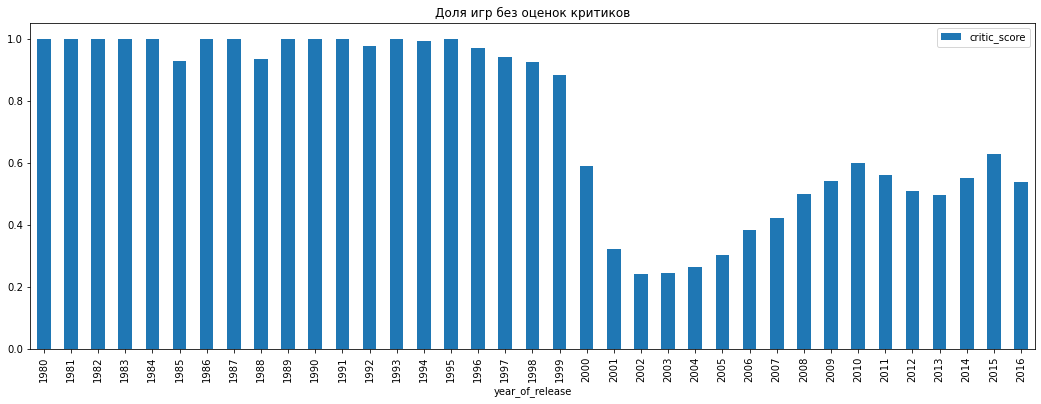

In [108]:
df.groupby('year_of_release') \
    .agg({'critic_score': lambda x: x.isnull().mean()}) \
    .plot.bar(title='Доля игр без оценок критиков', figsize=(18, 6));

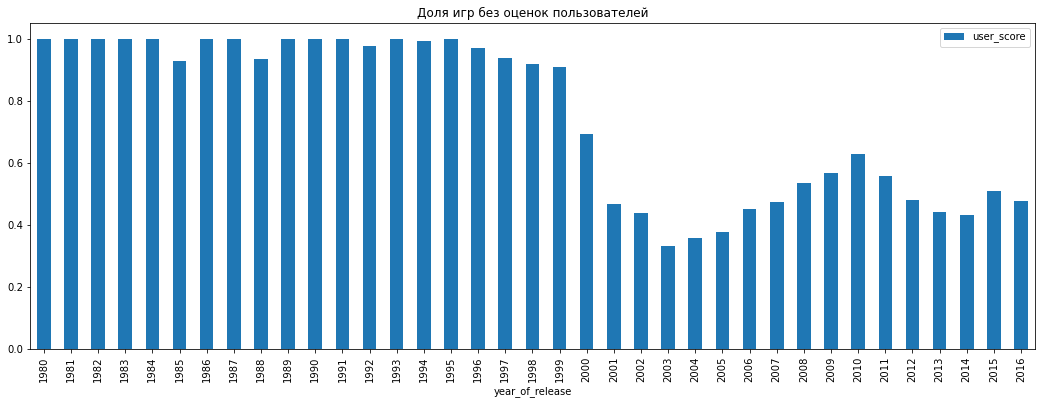

In [109]:
df.groupby('year_of_release') \
    .agg({'user_score': lambda x: x.isnull().mean()}) \
    .plot.bar(title='Доля игр без оценок пользователей', figsize=(18, 6));

Видим, что в районе 2000-2001 годов наблюдается заметное снижение доли компьютерных игр, оставшихся без рецензии критиков и пользователей. Каковы причины? Поиск в интернете привел к следующим результатам -- в эти годы начали свою работу крупнейшие англоязычный веб-сайты, собирающие рецензии, в том числе и на компьютерные игры, например, [**Rotten Tomatoes, 1998**](https://ru.wikipedia.org/wiki/Rotten_Tomatoes), [**GameRankings, 1999**](https://ru.wikipedia.org/wiki/GameRankings),  [**Metacritic, 2001**](https://ru.wikipedia.org/wiki/Metacritic), [**GameStats, 2002**](https://ru.wikipedia.org/wiki/GameStats). На данных сайтах рейтинги игр формируются, в том числе, по рейтингам игровой прессы и игроков. Иными словами, начиная с 1998 года появляются агрегаторы, собирающие рецензии профессионального сообщества об играх, как следствие, уменьшается доля игр без оценки.

На удивление, но перечисленные выше сайты-агрегаторы принадлежат американским компаниям. В связи с этим логично предположить, что некоторые игры, созданные или реализуемые не в США, могли остаться без оценок.

In [110]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [111]:
df.rating.fillna('undefined', inplace = True)

In [112]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Признаки 'critic_score' и 'user_score' оставим без изменений и будем наблюдать дальше и принимать решение.

## Анализ данных

In [113]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [114]:
df.describe(include=[object])

,name,platform,genre,rating
count,16444,16444,16444,16444
unique,11426,31,12,9
top,Need for Speed: Most Wanted,PS2,Action,undefined
freq,12,2127,3307,6676


In [115]:
dict_to_rus = {
'name':'название игры',
'platform':'платформа',
'year_of_release': 'год выпуска',
'genre': 'жанр игры',
'na_sales': 'продажи в Северной Америке',
'eu_sales': 'продажи в Европе',
'jp_sales': 'продажи в Японии',
'other_sales': 'продажи в других странах',
'critic_Score': 'оценка критиков',
'user_Scor': 'оценка пользователей',
'rating':'рейтинг от организации ESRB'
} 

In [116]:
category_ = ['platform', 'genre', 'rating']

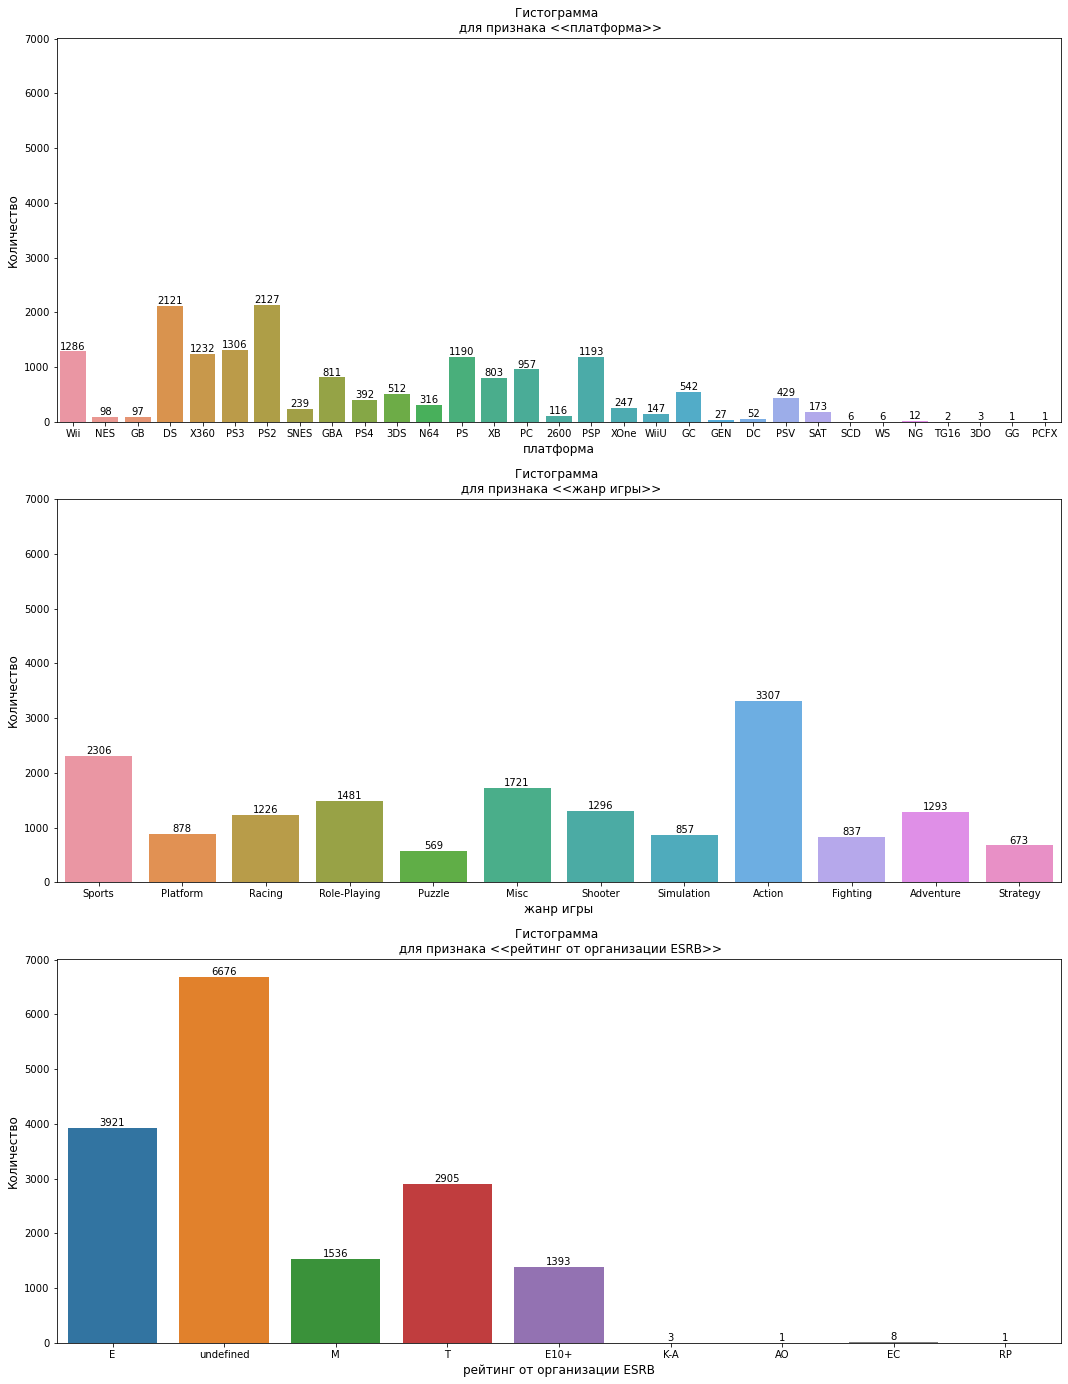

In [117]:
fig, axes = plt.subplots(3, sharey=True, figsize=(18,24))
i=0
for i, col in enumerate(category_):
    plt.subplot(3,1,i+1)
    ax = sns.countplot(x=col, data=df)
    plt.title("Гистограмма \n для признака <<{}>>".format(dict_to_rus[col]))
    plt.xlabel(dict_to_rus[col], fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:d}'.format(p.get_height()), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

Создадим новую колонку с продажами по всем районам и удалим продажи = 0

In [118]:
#df.drop(df.query('(na_sales == 0) & (eu_sales == 0) & (jp_sales == 0) & (other_sales == 0)').index, inplace=True)

In [119]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined,0.01


In [120]:
df.query('(na_sales == 0) & (eu_sales == 0) & (jp_sales == 0) & (other_sales == 0)').index

Int64Index([16676, 16709], dtype='int64')

C:\Users\User\AppData\Local\Temp\ipykernel_8488\813827373.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  games_all = df.groupby(['year_of_release'])['year_of_release','name'].agg({'name':'count'})


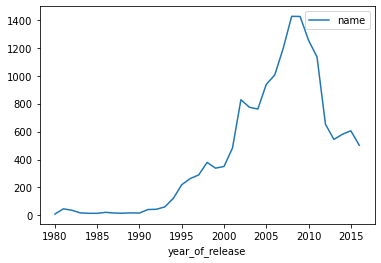

In [121]:
games_all = df.groupby(['year_of_release'])['year_of_release','name'].agg({'name':'count'})
games_all.plot()
plt.show();

Видим, что начиная с 1990 года до 2008 год, наблюдается рост выпуска компьютерных игр, а вот начиная с 2009 года объемы выпуска снижаются. Возможно это связано с ростом числа игр для телефонов. С 2012 года наблюдается определенная стабилизация объемов выпуска. Возможно именно за этот период данные будут полезными для дальнейшего анализа, особенно в краткосрочном периоде --- на 1 год.

#### Платформы с наибольшими суммарными продажами

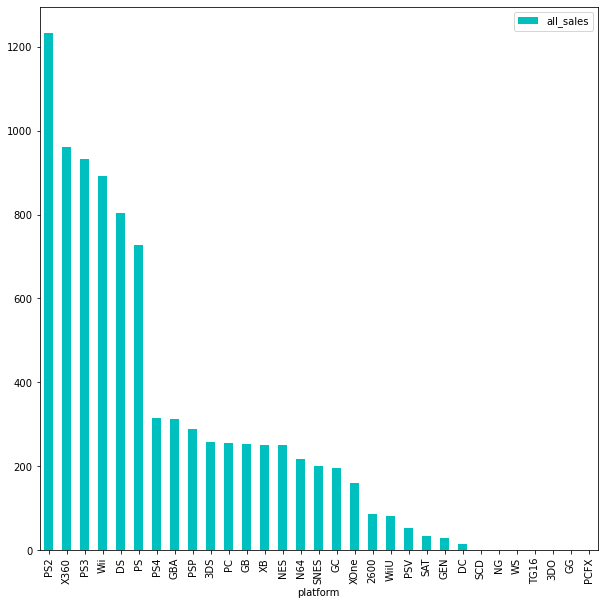

In [122]:
platform_on_sales = df.groupby('platform').agg({'all_sales':'sum'})\
    .sort_values(by='all_sales', ascending=False)\
    .plot(kind='bar', figsize=(10,10), color='c')

Лидером по продажам во всей выборке является платформа PS2. Но также видим еще 5 платформ с лидирующими продажами. Посмотрим на них отдельно.

In [123]:
def hist_of_platform(Model, title):
    df[df['platform'] == Model]\
        .groupby('year_of_release')\
        .agg({'all_sales':'sum'})\
        .plot(kind='bar', figsize=(6,8))
    plt.xlabel('Год')
    plt.ylabel('Суммарная выручка (млн.)')
    plt.title(title)
    plt.legend(['Общая выручка'])

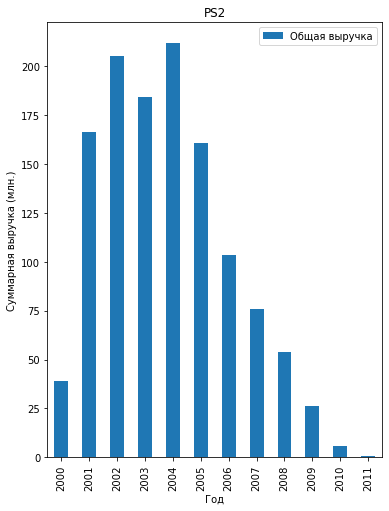

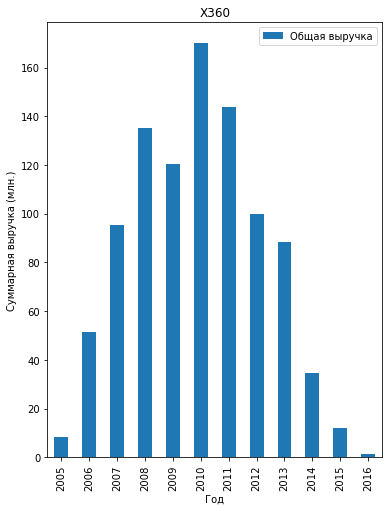

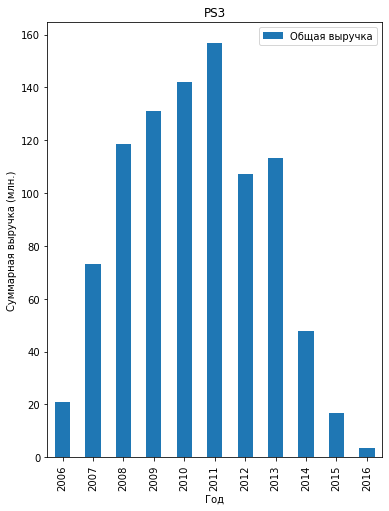

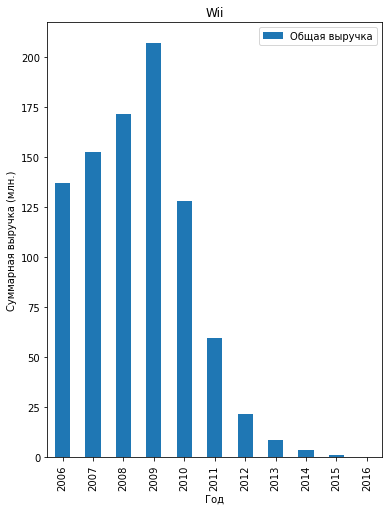

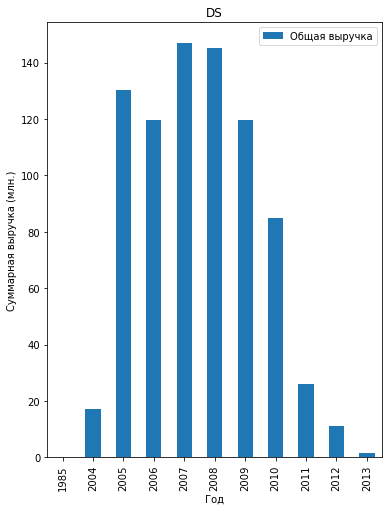

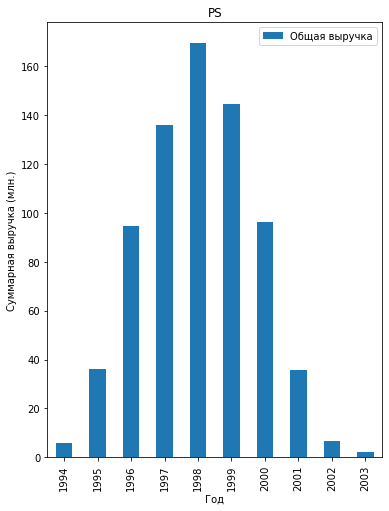

In [124]:
hist_of_platform('PS2', 'PS2')
hist_of_platform('X360', 'X360')
hist_of_platform('PS3', 'PS3')
hist_of_platform('Wii', 'Wii')
hist_of_platform('DS', 'DS')
hist_of_platform('PS', 'PS')

Как видим, жизненный цикл каждой платформы - около 10-ти лет и пик продаж в среднем приходится на 3-й или 4-й год с момента выпуска консоли. Так же можно обратить внимание, что как только у семейства PS происходит снижение продаж, то на смену приходит следующее поколение консолей. Построим график и посмотрим так ли это, т.к. семейство PS занимает много лидирующих позиций, то построим график роста и спад продаж между поколениями и примерно посмотрим как это работает. Данные помогут нам ориентрироваться за какой период стоит взять актуальные данные и работать с ними.

In [125]:
PS = df[df['platform'] == 'PS']\
    .groupby('year_of_release', as_index=False)\
    .agg({'all_sales':'sum'})
PS2 = df[df['platform'] == 'PS2']\
    .groupby('year_of_release', as_index=False)\
    .agg({'all_sales':'sum'})
PS3 = df[df['platform'] == 'PS3']\
    .groupby('year_of_release', as_index=False)\
    .agg({'all_sales':'sum'})
PS4 = df[df['platform'] == 'PS4']\
    .groupby('year_of_release', as_index=False)\
    .agg({'all_sales':'sum'})

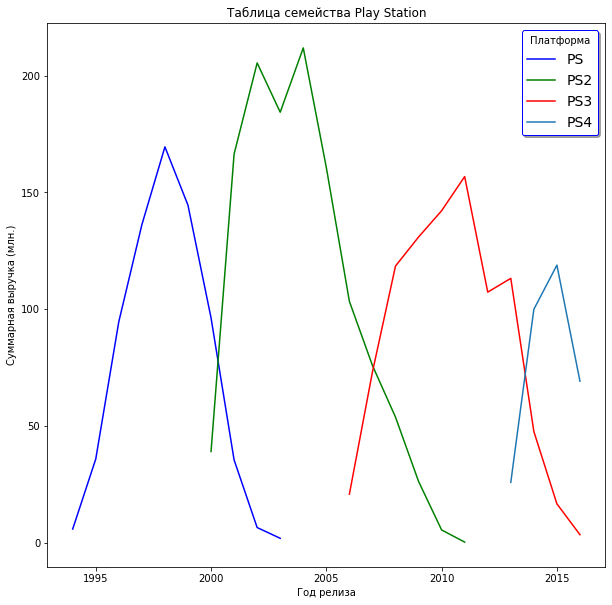

In [126]:
ax = plt.figure( figsize=(10, 10))
plt.plot(PS.year_of_release, PS.all_sales, 'b',
         PS2.year_of_release, PS2.all_sales, 'g',
         PS3.year_of_release, PS3.all_sales, 'r',
         PS4.year_of_release, PS4.all_sales)
plt.xlabel('Год релиза')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Таблица семейства Play Station')
plt.legend(['PS','PS2', 'PS3', 'PS4'], fontsize=14, shadow=True, facecolor='w', edgecolor='b', title='Платформа')

Теперь посмотрим как обстоят дела у семейства Xbox

In [127]:
X360 = df[df['platform'] == 'X360']\
    .groupby('year_of_release', as_index=False)\
    .agg({'all_sales':'sum'})
XB = df[df['platform'] == 'XB']\
    .groupby('year_of_release', as_index=False)\
    .agg({'all_sales':'sum'})
XOne = df[df['platform'] == 'XOne']\
    .groupby('year_of_release', as_index=False)\
    .agg({'all_sales':'sum'})

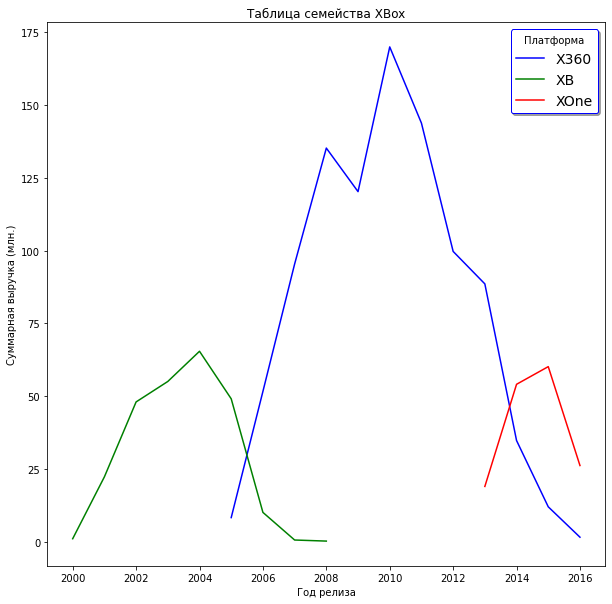

In [128]:
ax = plt.figure( figsize=(10, 10))
plt.plot(X360.year_of_release, X360.all_sales, 'b',
         XB.year_of_release, XB.all_sales, 'g',
         XOne.year_of_release, XOne.all_sales, 'r')
plt.xlabel('Год релиза')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Таблица семейства XBox')
plt.legend(['X360','XB', 'XOne'], fontsize=14, shadow=True, facecolor='w', edgecolor='b', title='Платформа')

В обеих семействах наблюдается обновление поколения платформы при спаде предыдущего поколения платформы. Так же можно заметить, что предыдущее поколение "умирает" приблизительно через 4-5 лет после выпуска нового поколения, а пик продаж на новое поколение приходится приблизительно через 4-5 лет после выпуска. А так же, что в среднем поколение "живёт" около 8-10 лет. Итак, исходя из данных можно сделать вывод, что:

Спад игр пошёл с 2012 года.
В среднем платформа живёт 8-10 лет, а пик продаж игр на платформу приходится ~ через 4-5 лет.
Поэтому для того, чтобы объективно составить прогноз на 2017 год, то возьмём данные начиная с 2014 года, как раз когда продажи игр упали, старые поколения популярных платформ начинают "умирать", а новые начинают набирать обороты. Хотя судя по графику, не успев выйти, спустя 2 года продажи игры на эти платформы начинают стабильно падать (с 2012 года).

#### Теперь посмотрим на лидеров за наш актуальный период. Построим графики.

In [129]:
new_df = df[df['year_of_release'] >= 2014]

In [130]:
new_new = new_df.groupby(['year_of_release', 'platform'], as_index=False)\
    .agg({'all_sales':'sum'})\
    .sort_values(by='year_of_release')

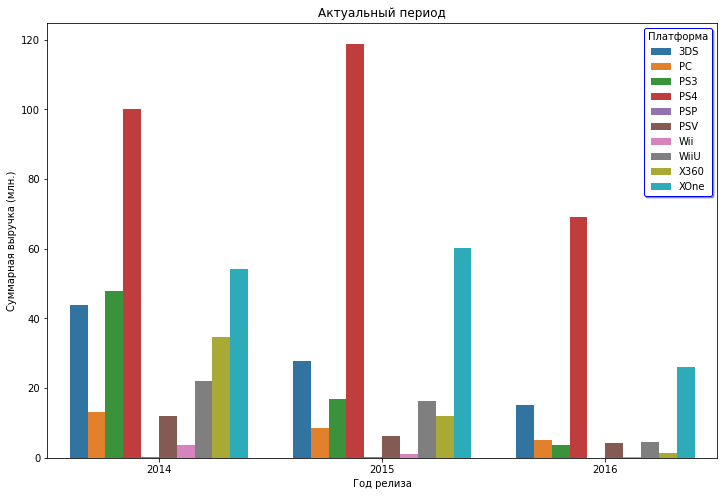

In [131]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(ax=ax, x = "year_of_release", y = "all_sales", hue = "platform", data = new_new)
plt.xlabel('Год релиза')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.legend(fontsize=10, shadow=True, facecolor='w', edgecolor='b', title='Платформа')

(0.0, 3.0)

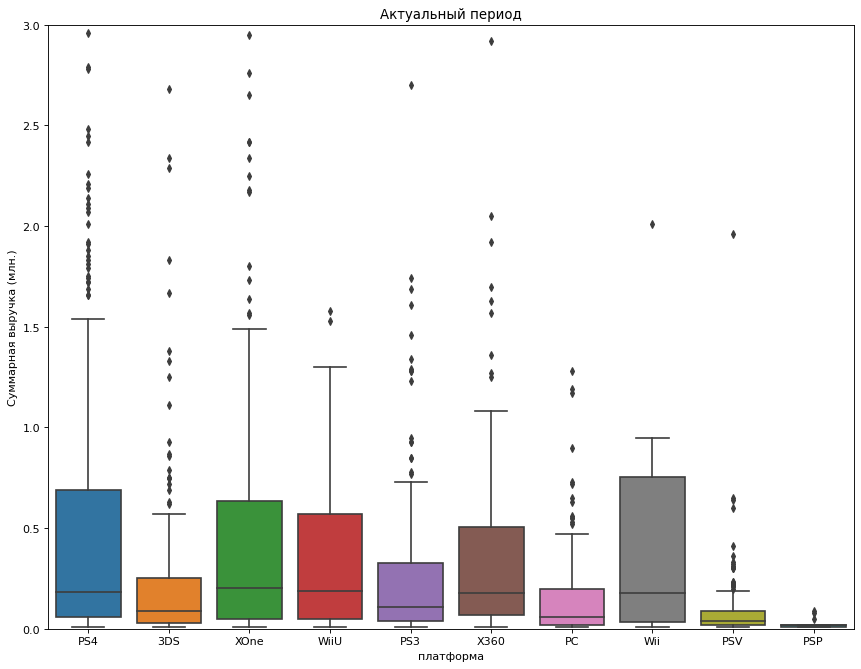

In [132]:
plt.figure(figsize=(13,10), dpi=80)
sns.boxplot(x='platform', y='all_sales', data=new_df)
plt.xlabel('платформа')
plt.ylabel('Суммарная выручка (млн.)')
plt.title('Актуальный период')
plt.ylim([0, 3])

Как видим, что начиная с 2014 года старые платформы начинают уходить в небытие, а новые поколения встают в лидирующие позциии по продажам игр, но потом идёт общий упадок продаж. Тут можно сразу выделить самого крупного игрока и это PS4. На 2-м месте идёт его конкурент XOne. Так же можно обратить внимание, что есть средние лидеры по продажам. Туда можно отнести X360, WiiU, Wii. И на самом последнем месте оказались портативные приставки. В целом, ничего удивительного.

Итак, теперь мы определились с нашим явным лидером и посмотрим есть ли взаимосзязь между отзывами пользователей и критиков и влияет ли это как-то на продажи.

In [133]:
lider_PS = new_df[new_df['platform'] == "PS4"]
lider_PS = lider_PS[lider_PS['user_score'].isnull() == False] 
lider_PS = lider_PS[lider_PS['critic_score'].isnull() == False]
lider_PS = lider_PS[['platform', 'user_score', 'critic_score', 'all_sales']]

Text(0.5, 1.0, 'Взаимосвязь между общими продажами и оценками')

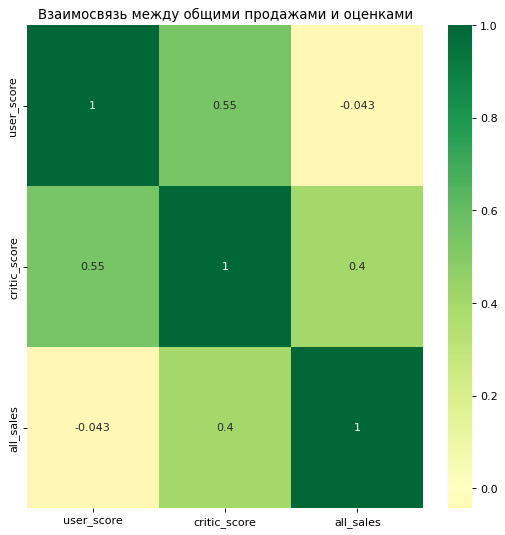

In [134]:
plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(lider_PS.corr(), xticklabels=lider_PS.corr().columns,\
            yticklabels=lider_PS.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Взаимосвязь между общими продажами и оценками')

Итак, как мы видим, что оценки пользователей абсолютно никак не влияют на продажи игр, но в то же время видно, что всё-таки оценки критиков имеют небольшой вес. Теперь посмотрим как обстоят дела с другими платформами.

In [135]:
corr_df = new_df[new_df['platform'] != "PS4"]
corr_df = corr_df[corr_df['user_score'].isnull() == False] 
corr_df = corr_df[corr_df['critic_score'].isnull() == False]
corr_df = corr_df[['platform', 'user_score', 'critic_score', 'all_sales']]

Text(0.5, 1.0, 'Взаимосвязь между общими продажами и оценками')

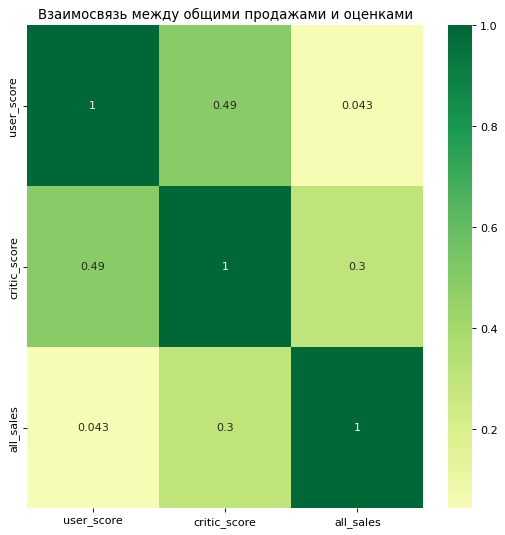

In [136]:
plt.figure(figsize=(8,8), dpi= 80)
sns.heatmap(corr_df.corr(), xticklabels=corr_df.corr().columns,\
            yticklabels=corr_df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Взаимосвязь между общими продажами и оценками')

Заметим, что ситуация аналогичная. Оценки пользователей особой роли не играют, но вот оценки критиков всё же имеют как-то вес, что в целом и понятно, если среди аудитории критики заслужили доверия, то и их влияние будет как-то влиять на продажи данных игр, что нельзя сказать про оценки обычных пользователей.

## Составим портрет пользователя каждого региона

### Посмотрим на самые популярные платформы по регионам

$\blacktriangleright$ В Северной Америке 

In [137]:
top_5_from_2014 = new_new.reset_index().rename_axis(None, axis=1)[:5]
display(top_5_from_2014)

,index,year_of_release,platform,all_sales
0,0,2014,3DS,43.76
1,1,2014,PC,13.28
2,2,2014,PS3,47.76
3,3,2014,PS4,100.00
4,4,2014,PSP,0.24


In [138]:
df_top5_plat_from_2014 = df[df.year_of_release >= 2014].loc[df['platform'].isin(list(top_5_from_2014['platform']))]

In [139]:
na = pd.crosstab(index=df_top5_plat_from_2014['year_of_release'], columns=df_top5_plat_from_2014['platform'], 
            values=df_top5_plat_from_2014['na_sales'],
                    aggfunc='sum', normalize='index').mul(100)

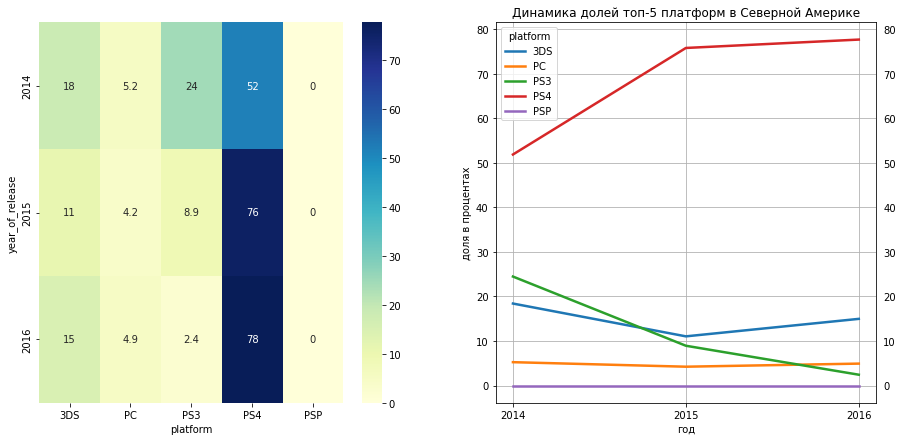

In [140]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
sns.heatmap(na, cmap="YlGnBu", annot=True, ax = ax[0]);
na.plot(grid=True, lw=2.5, ax = ax[1] )
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=na.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 платформ в Северной Америке')
plt.show();

$\blacktriangleright$ В Европе

In [141]:
eu = pd.crosstab(index=df_top5_plat_from_2014['year_of_release'], columns=df_top5_plat_from_2014['platform'], 
            values=df_top5_plat_from_2014['eu_sales'],
                    aggfunc='sum', normalize='index').mul(100)

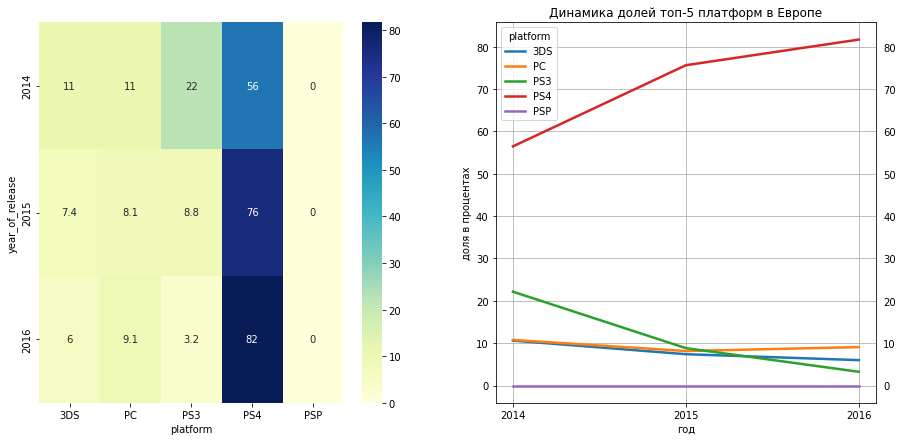

In [142]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
sns.heatmap(eu, cmap="YlGnBu", annot=True, ax = ax[0]);
eu.plot(grid=True, lw=2.5, ax = ax[1] )
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=eu.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 платформ в Европе')
plt.show();

$\blacktriangleright$ В Японии

In [143]:
jp = pd.crosstab(index=df_top5_plat_from_2014['year_of_release'], columns=df_top5_plat_from_2014['platform'], 
            values=df_top5_plat_from_2014['jp_sales'],
                    aggfunc='sum', normalize='index').mul(100)

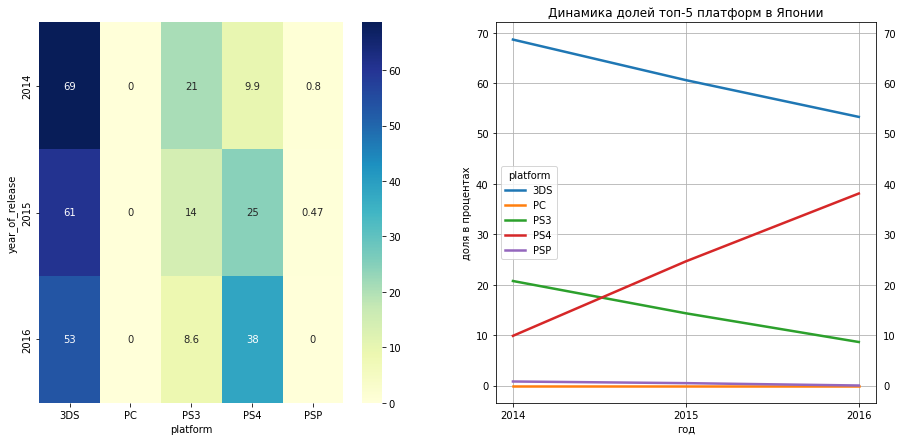

In [144]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
sns.heatmap(jp, cmap="YlGnBu", annot=True, ax = ax[0]);
jp.plot(grid=True, lw=2.5, ax = ax[1] )
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=jp.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 платформ в Японии')
plt.show();

Итак, видим, что в Северной Америке и Европе со значительным перевесом по доли продаваемых игр лидирует платформа `PS4`, второе место занимает платформа `XOne`. А в Японии ситуация несколько иная. Лидерство принадлежит платформе `3DS`, но, как видно из графика, намечается тенденция к снижению объемов продаж игр для этой платформы. Второе место занимает платформа `PS4` с тенденцией к улучшению своих позиций. Это объясняется тем, что платформа [**PS4**](https://ru.wikipedia.org/wiki/PlayStation_4) поступила на рынок Японии только в 2014 году, а платформа [**3DS**](https://ru.wikipedia.org/wiki/Nintendo_3DS) на рынке Японии с 2011 года.

### Самые популярные жанры по регионам

$\blacktriangleright$ В Северной Америке 

In [145]:
na = pd.crosstab(index=df_top5_plat_from_2014['year_of_release'], columns=df_top5_plat_from_2014['genre'], 
            values=df_top5_plat_from_2014['na_sales'],
                    aggfunc='sum', normalize='index').mul(100)
top5_genre = na[df_top5_plat_from_2014.genre.unique()].apply('sum', axis = 0).sort_values(ascending = False)[:5]
list(top5_genre.index)
top5_genre_na = na[list(top5_genre.index.sort_values())]
top5_genre_na

genre,Action,Fighting,Role-Playing,Shooter,Sports
year_of_release,,,,,
2014,30.650941,5.882353,15.706181,17.781427,14.616303
2015,28.556092,4.061549,16.049383,24.548220,17.910181
2016,21.221981,3.976862,17.570499,33.044107,14.931309


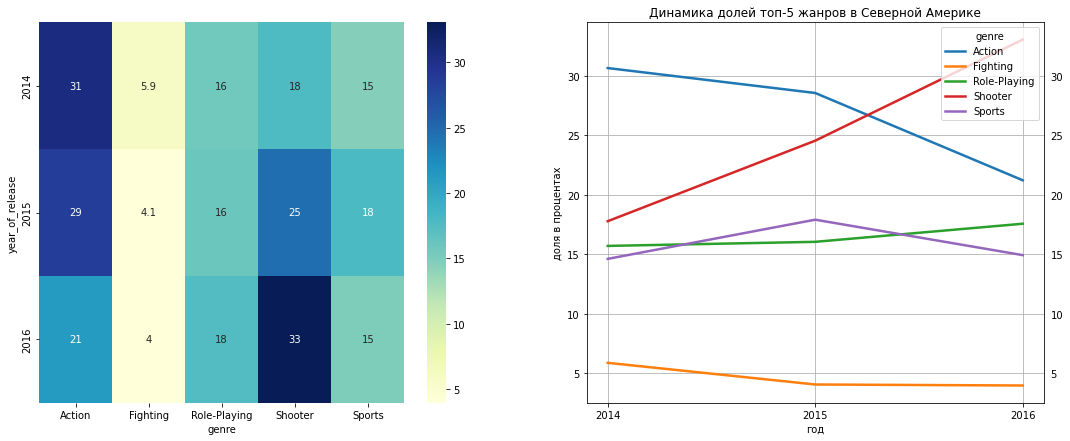

In [146]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 7)
sns.heatmap(top5_genre_na, cmap="YlGnBu", annot=True, ax = ax[0]);
top5_genre_na.plot(grid=True, lw=2.5, ax = ax[1])
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=top5_genre_na.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 жанров в Северной Америке')
plt.show();

$\blacktriangleright$ В Европе

In [147]:
eu = pd.crosstab(index=df_top5_plat_from_2014['year_of_release'], columns=df_top5_plat_from_2014['genre'], 
            values=df_top5_plat_from_2014['eu_sales'],
                    aggfunc='sum', normalize='index').mul(100)
top5_genre = eu[df_top5_plat_from_2014.genre.unique()].apply('sum', axis = 0).sort_values(ascending = False)[:5]
list(top5_genre.index)
top5_genre_eu = eu[list(top5_genre.index.sort_values())]
top5_genre_eu

genre,Action,Racing,Role-Playing,Shooter,Sports
year_of_release,,,,,
2014,33.300947,4.238523,11.306777,18.872966,14.488705
2015,26.918018,4.603244,14.788835,23.586146,16.937016
2016,20.411311,2.467866,9.177378,30.951157,23.136247


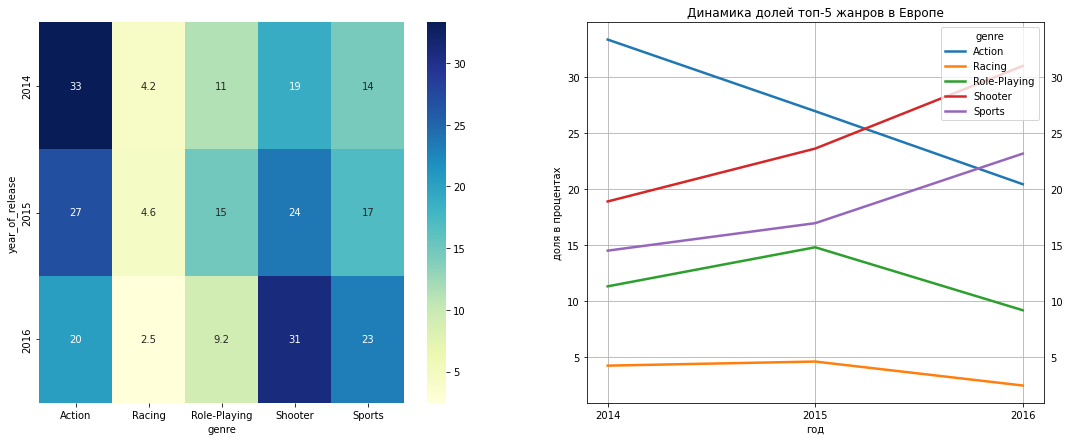

In [148]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 7)
sns.heatmap(top5_genre_eu, cmap="YlGnBu", annot=True, ax = ax[0]);
top5_genre_eu.plot(grid=True, lw=2.5, ax = ax[1])
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=top5_genre_eu.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 жанров в Европе')
plt.show();

$\blacktriangleright$ В Японии

In [149]:
jp = pd.crosstab(index=df_top5_plat_from_2014['year_of_release'], columns=df_top5_plat_from_2014['genre'], 
            values=df_top5_plat_from_2014['jp_sales'],
                    aggfunc='sum', normalize='index').mul(100)
top5_genre = jp[df_top5_plat_from_2014.genre.unique()].apply('sum', axis = 0).sort_values(ascending = False)[:5]
list(top5_genre.index)
top5_genre_jp = jp[list(top5_genre.index.sort_values())]
top5_genre_jp

genre,Action,Fighting,Misc,Role-Playing,Shooter
year_of_release,,,,,
2014,15.986733,12.139303,3.051410,51.674959,3.150912
2015,53.903201,3.044496,5.191257,19.476971,4.683841
2016,35.102853,3.185136,4.379562,37.226277,6.569343


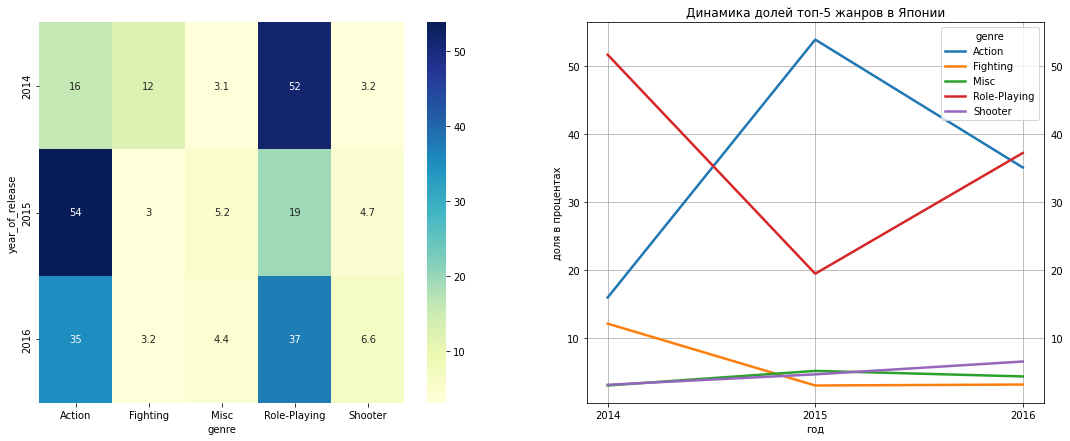

In [150]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 7)
sns.heatmap(top5_genre_jp, cmap="YlGnBu", annot=True, ax = ax[0]);
top5_genre_jp.plot(grid=True, lw=2.5, ax = ax[1])
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=top5_genre_jp.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 жанров в Японии')
plt.show();

**Вывод по жанрам** 
- в Северной Америке и Европе популярен практически одинаковый набор жанров `Action, Misc, Role-Playing, Shooter, Sports` и `Action, Racing, Role-Playing, Shooter, Sports`, соответственно. В последние годы наибольшей популярностью у покупателей этих регионов пользуются игры жанра `Shooter`, менее популярны жанры `Action` и `Sports`.
- в Японии топ-5 жанров игр это `Action, Fighting, Role-Playing, Shooter, Simulation`. Набор немного отличается от североамеринского и европеского, а именно жанрами `Fighting` и `Simulation`. Сменяя друг друга, лидерство удерживают жанры `Action` и `Role-Playing`. Жанр `Shooter` не пользуется успехом у покупателей Японии.

### Влияние рейтинга ESRB на продажи

Итак, как мы помним, что в столбце rating лежат оценки согласно организации ESRB:

* E - для всех возрастов (все)
* T - для лиц от 13 лет и старше (младший подросток)
* M - от 17 лет и старше (старший подросток)
* E10+ - от 10 лет и старше (ребёнок)
* RP - оценка ещё не присвоена
* K-A - для всех возрастов (все), тоже самое, что и Е
* AO - для лиц старше 18 лет (взрослый)

In [151]:
dict_rating = {'E':'игры для всех',
               'E10+':'старше 10 лет',
               'T':'старше 13 лет',
               'M':'старше 17 лет',
               'undefined': 'Рейтинг неизвестен'}
df_top5_plat_from_2014['rating'] = df_top5_plat_from_2014['rating'].map(dict_rating)

$\blacktriangleright$ В Северной Америке 

In [152]:
na = pd.crosstab(index=df_top5_plat_from_2014['year_of_release'], columns=df_top5_plat_from_2014['rating'], 
            values=df_top5_plat_from_2014['na_sales'],
                    aggfunc='sum', normalize='index').mul(100)
na

rating,Рейтинг неизвестен,игры для всех,старше 10 лет,старше 13 лет,старше 17 лет
year_of_release,,,,,
2014,27.306659,16.796059,7.599283,13.899672,34.398328
2015,30.416890,15.441045,11.594203,12.900340,29.647522
2016,24.475777,15.835141,5.314534,23.463485,30.911063


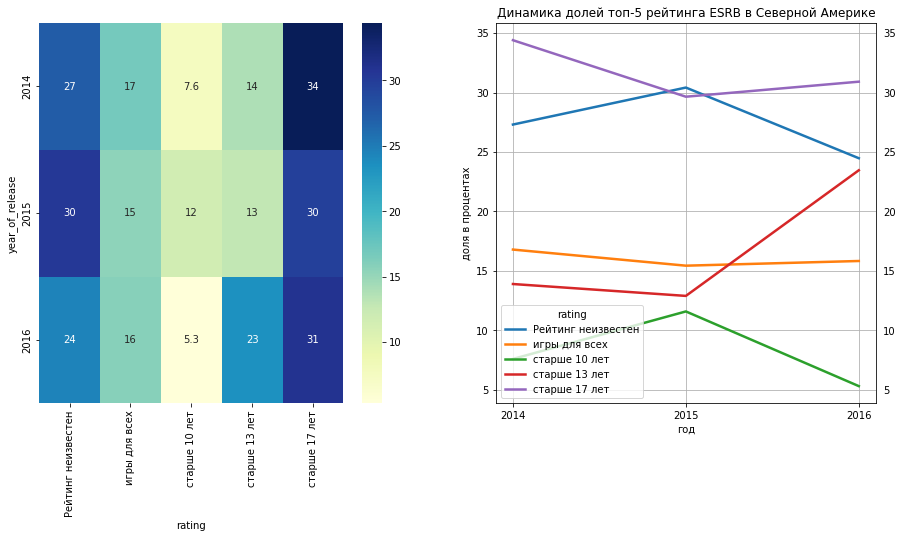

In [153]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
sns.heatmap(na, cmap="YlGnBu", annot=True, ax = ax[0]);
na.plot(grid=True, lw=2.5, ax = ax[1] )
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=na.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 рейтинга ESRB в Северной Америке')
plt.show();

$\blacktriangleright$ В Европе

In [154]:
eu = pd.crosstab(index=df_top5_plat_from_2014['year_of_release'], columns=df_top5_plat_from_2014['rating'], 
            values=df_top5_plat_from_2014['eu_sales'],
                    aggfunc='sum', normalize='index').mul(100)
eu

rating,Рейтинг неизвестен,игры для всех,старше 10 лет,старше 13 лет,старше 17 лет
year_of_release,,,,,
2014,21.811999,18.022832,7.748360,12.339082,40.077726
2015,31.243607,20.473477,5.611574,10.916265,31.755078
2016,16.349614,25.552699,5.475578,20.976864,31.645244


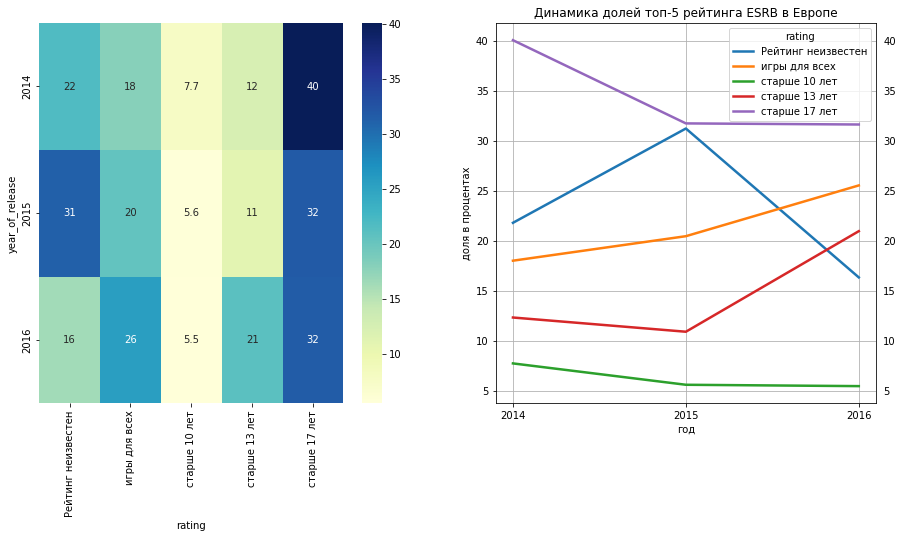

In [155]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
sns.heatmap(eu, cmap="YlGnBu", annot=True, ax = ax[0]);
eu.plot(grid=True, lw=2.5, ax = ax[1] )
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=eu.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 рейтинга ESRB в Европе')
plt.show();

$\blacktriangleright$ В Японии

In [156]:
jp = pd.crosstab(index=df_top5_plat_from_2014['year_of_release'], columns=df_top5_plat_from_2014['rating'], 
            values=df_top5_plat_from_2014['jp_sales'],
                    aggfunc='sum', normalize='index').mul(100)
jp

rating,Рейтинг неизвестен,игры для всех,старше 10 лет,старше 13 лет,старше 17 лет
year_of_release,,,,,
2014,64.079602,6.401327,3.548922,16.351575,9.618574
2015,60.655738,9.718970,4.527713,14.441842,10.655738
2016,73.589914,6.768414,0.729927,11.214333,7.697412


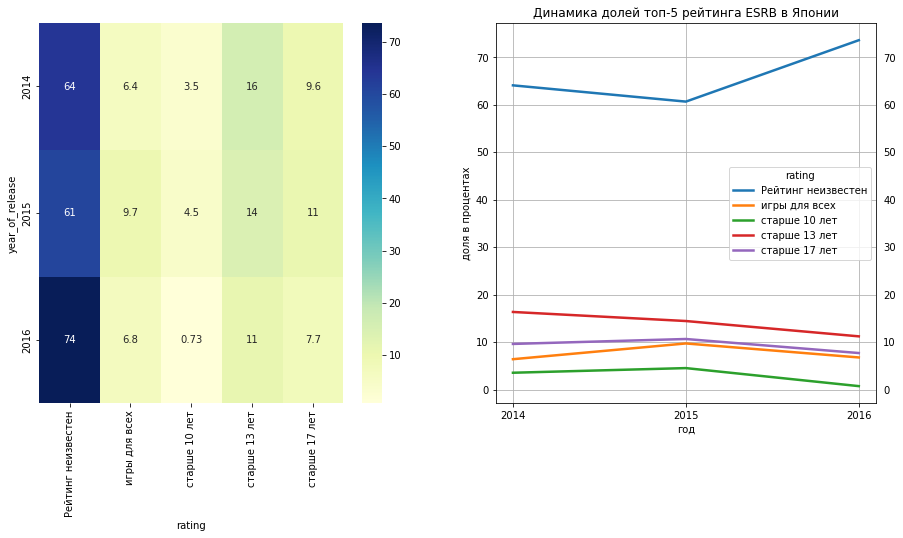

In [157]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 7)
sns.heatmap(jp, cmap="YlGnBu", annot=True, ax = ax[0]);
jp.plot(grid=True, lw=2.5, ax = ax[1] )
plt.tick_params(axis='both', which='major', labelleft=True, labelright = True, labelbottom = True, labeltop=False)
plt.xticks(ticks=jp.index.to_list())
plt.xlabel('год')
plt.ylabel('доля в процентах')
plt.yticks(rotation=0)
plt.title('Динамика долей топ-5 рейтинга ESRB в Японии')
plt.show();

В Европе и Северной Америке лидируют возрастные категории от 17 лет и игры для всех, а вот в Японии выделяются игры от 13 лет и игры для всех.

### Портрет каждого региона

**Япония:**

1. Самые популярные игровые платформы в Японии - японские платформы (топ-5): 3DS, PS4, PSV, PS3, WiiU
2. Самые популярные жанры в Японии (топ - 5 по убыванию): Role-Playing, Action, Fighting, Misc, Shooter
3. Самый предпочитаемый рейтинг в Японии по убыванию: игры от 13 лет, игры для всех, игры от 17 лет, игры от 10 лет.

**Северная Америка:**

1. Самые популярные игровые платформы в Северной Америке (топ-5): PS4, XOne, X360, 3DS, PS3
2. Самые популярные жанры в Северной Америке (топ - 5 по убыванию): Shooter, Action, Sports, Role-Playing, Misc
3. Самый предпочитаемый рейтинг в Северной Америке по убыванию: игры от 17 лет, игры для всех, игры от 13 лет, от 10 лет.

**Европа:**

1. Самые популярные игровые платформы Европе (топ-5): PS4, XOne, PS3, PC, 3DS
2. Самые популярные жанры в Европе (топ - 5 по убыванию): Action, Shooter, Sports, Role-Playing, Racing
3. Самый предпочитаемый рейтинг в Европе по убыванию: игры от 17 лет, игры для всех, игры от 13 лет, от 10 лет.

### Проверим гипотезы

У нас есть две гипотезы, которые говорят о том, что:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Средние пользовательские рейтинги жанров Action и Sports разные
Сформулируем первую гипотезу.

(H0) - Нулевая гипотеза говорит нам о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

(H1) - Альтернативная гипотеза говорит нам о том, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

Итак, подготовим наши датасеты для исследования.

In [159]:
XOne = new_df[new_df['platform'] == 'XOne']
XOne = XOne[XOne['user_score'].isnull() == False] 
PC = new_df[new_df['platform'] == 'PC']
PC = PC[PC['user_score'].isnull() == False]

Теперь посмотрим на наши распределения для того, чтобы правильно провести исследование о равенстве дисперсий по критерию Левене и в дальнейшем провести t - тест, чтобы узнать действительно ли средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Text(0.5, 1.0, 'Распределение')

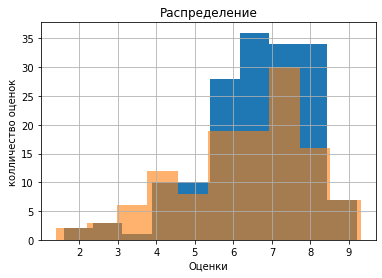

In [160]:
XOne.user_score.hist()
PC.user_score.hist(alpha=0.6)
plt.xlabel('Оценки')
plt.ylabel('колличество оценок')
plt.title('Распределение')

Распределение ненормальное

In [163]:
st.levene(XOne.user_score, PC.user_score, center ='median')

LeveneResult(statistic=6.004772988517075, pvalue=0.014868430917663678)

pvalue меньше 0.05, что говорит нам о том, что отличие значимое

#### Проведём t- test

In [164]:
def t_test(first_df, second_df, alpha, equal_var):
    alpha = alpha
    results = st.ttest_ind(first_df, second_df, equal_var = equal_var)
    print('p-значение:', results.pvalue)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else: 
        print("Не получилось отвергнуть нулевую гипотезу")

In [165]:
t_test(XOne.user_score, PC.user_score, 0.05, False)

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Как видим, что t - тест нам показал, что мы не можем отвергнуть нулевую гипотезу, следовательно средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Так же попробуем провести **bootstrap** - метод, основанный на многократной генерации выборок методом Монте-Карло среди известных нам выборок. Условно говоря, мы представляем, что наша выборка - это генеральная совокупность и мы извлекаем из неё многократно выборки и сравниваем различие средних между собой.

In [166]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = st.norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = st.norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

  0%|          | 0/1000 [00:00<?, ?it/s]

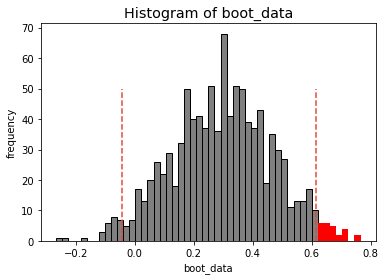

{'boot_data': [0.1503030303030302,
  0.286060606060606,
  0.5678787878787878,
  0.4175757575757576,
  0.0024242424242424047,
  0.273939393939394,
  0.24060606060606057,
  0.49393939393939384,
  0.2745454545454544,
  0.4872727272727273,
  0.3406060606060605,
  0.03393939393939395,
  0.45030303030303037,
  0.3284848484848485,
  0.21818181818181823,
  0.34363636363636363,
  0.3915151515151515,
  0.4715151515151515,
  0.42606060606060603,
  0.2557575757575757,
  0.6630303030303029,
  0.17818181818181825,
  0.34606060606060607,
  -0.12121212121212126,
  0.1733333333333333,
  0.5042424242424243,
  0.4569696969696969,
  0.41878787878787876,
  0.4090909090909091,
  0.5321212121212121,
  0.2539393939393938,
  0.26060606060606056,
  0.4824242424242423,
  0.16060606060606064,
  0.2799999999999999,
  0.4793939393939394,
  0.5806060606060605,
  0.34121212121212113,
  0.4109090909090908,
  0.5054545454545455,
  0.3127272727272727,
  0.31090909090909086,
  0.3006060606060605,
  0.20848484848484847,
 

In [167]:
get_bootstrap(XOne.user_score, PC.user_score, boot_it = 1000, statistic = np.mean, bootstrap_conf_level = 0.95)

Различия незначимы. Так же видим, что в доверительном интервале есть 0 и следовательно у нас есть вероятность получить одинаковые средние рейнтинги по двум платформам, что говорит нам о том, что у нас не получится отвергнуть нулевую гипотезу и принять альтернативную.

**Перейдём ко второй гипотезе и посмотрим различаются ли средние пользовательские рейтинги жанров Action и Sports.**
Сформулируем гипотезы.

(H0) - Нулевая гипотеза говорит нам о том, что средние пользовательские рейтинги жанров Action и Sports равны.

(H1) - Альтернативная гипотеза говорит нам о том, средние пользовательские рейтинги жанров Action и Sports различаются.

Подготовим данные для исследования.

In [168]:
Action = new_df[new_df['genre'] == 'Action']
Action = XOne[XOne['user_score'].isnull() == False] 
Sports = new_df[new_df['genre'] == 'Sports']
Sports = PC[PC['user_score'].isnull() == False]

Посмотрим на распределения

Text(0.5, 1.0, 'Распределение')

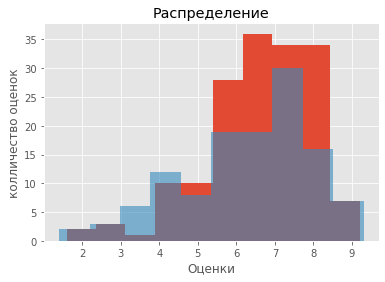

In [170]:
Action.user_score.hist()
Sports.user_score.hist(alpha=0.6)
plt.xlabel('Оценки')
plt.ylabel('колличество оценок')
plt.title('Распределение')

Распределение ненормальное

проведём **тест Левене**

In [171]:
st.levene(Action.user_score, Sports.user_score, center ='median')

LeveneResult(statistic=6.004772988517075, pvalue=0.014868430917663678)

Отличие дисперсий значимое. Проведём **t - test**

In [172]:
t_test(Action.user_score, Sports.user_score, 0.05, False)

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Как видим, что t - test показал нам, что различия значимы и мы можем принять альтернативную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports различаются. Проведём ещё один тест **bootstrap - методом**

  0%|          | 0/1000 [00:00<?, ?it/s]

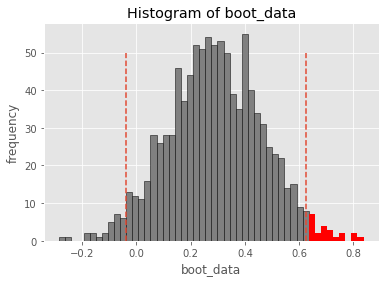

{'boot_data': [0.20242424242424242,
  0.3727272727272728,
  0.4412121212121212,
  0.1381818181818182,
  0.25454545454545446,
  0.1224242424242424,
  0.2587878787878788,
  0.23575757575757575,
  0.2896969696969696,
  0.21333333333333335,
  -0.07030303030303037,
  0.5872727272727272,
  0.4042424242424242,
  0.055757575757575686,
  0.23636363636363628,
  0.266060606060606,
  0.050909090909090876,
  -0.2575757575757575,
  0.3236363636363636,
  0.24363636363636357,
  0.23818181818181816,
  0.5878787878787879,
  0.3163636363636364,
  -0.05454545454545459,
  0.46,
  0.6036363636363636,
  0.22060606060606064,
  0.03939393939393945,
  0.34969696969696973,
  0.0527272727272727,
  0.40848484848484834,
  0.47757575757575754,
  0.30787878787878786,
  0.23212121212121212,
  0.06909090909090902,
  0.1103030303030303,
  0.5848484848484847,
  0.39333333333333326,
  -0.022424242424242576,
  0.5884848484848485,
  0.2593939393939394,
  0.05393939393939392,
  0.17696969696969692,
  0.20424242424242423,
  0

In [173]:
get_bootstrap(Action.user_score, Sports.user_score, boot_it = 1000, statistic = np.mean, bootstrap_conf_level = 0.95)

Различия значимы. Так же видим, что в доверительном интервале есть 0 и следовательно у нас нет вероятности получить одинаковые средние рейнтинги по двум жанрам, что говорит нам о том, что у нас получится отвергнуть нулевую гипотезу и принять альтернативную.

#### Итак, после проведения статистического анализа можем заключить, что:

- Средние пользовательские рейтинги платформ Xbox one и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

# Вывод

**Подведём итоги проделанной работы и сделаем вывод, что:**

1. Объём рынка по продажам игр упал в 2012 году и стабильно держится.
2. Портативные приставки теряют свою популярность.
3. Больше всего люди покупают игры на консоли семейства Xbox или Playstation.
4. Игры на ПК особо не берут.
5. В среднем поколение платформ живёт около 8-10 лет.
6. Пик продаж происходит на 4-5 год поколения.
7. Оценки пользователей никак не влияют на покупку игр, но вот мнение критиков имеет небольшой вес.
8. Людям неинтересны интеллектуальные игры, большинство людей предпочитает или экшн, или шутер.

**Если ориентироваться на рынок Японии, то:**

* Самые популярные игровые платформы в Японии - японские платформы (топ-5): 3DS, PS4, PSV, PS3, WiiU
* Самые популярные жанры в Японии (топ - 5 по убыванию): Role-Playing, Action, Fighting, Misc, Shooter
* Самый предпочитаемый рейтинг в Японии по убыванию: игры от 13 лет, игры для всех, игры от 17 лет, игры от 10 лет.

**Если ориентироваться на рынок Северной Америки:**

* Самые популярные игровые платформы в Северной Америке (топ-5): PS4, XOne, X360, 3DS, PS3
* Самые популярные жанры в Северной Америке (топ - 5 по убыванию): Shooter, Action, Sports, Role-Playing, Misc
* Самый предпочитаемый рейтинг в Северной Америке по убыванию: игры от 17 лет, игры для всех, игры от 13 лет, от 10 лет.

**Если ориентироваться на рынок Европы, то:**

* Самые популярные игровые платформы Европе (топ-5): PS4, XOne, PS3, PC, 3DS
* Самые популярные жанры в Европе (топ - 5 по убыванию): Action, Shooter, Sports, Role-Playing, Racing
* Самый предпочитаемый рейтинг в Европе по убыванию: игры от 17 лет, игры для всех, игры от 13 лет, от 10 лет.

### Рекомендации

Основную долю закупа провести для таких приставок как Sony Playstation 4, небольшую часть на Xbox. Среди жанров сделать акцент на Action и Shooter и выбирать игры с рейтингом от 17 и старше. Увеличить продажи по остаткам игр на портативные приставки, т.к. в скором времени они уйдут с мирового рынка и останутся популярны локально. На сайте (если таковой имеется) добавить раздел с оценочным мнением критиков.